In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("/content/EastWestAirlines.xlsx")

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [8]:
df.drop("ID#",axis=1,inplace=True)

In [9]:
x_df=pd.DataFrame(df)

In [10]:
x_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [11]:
x_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [12]:
type(x_df)

pandas.core.frame.DataFrame

In [13]:
y=x_df['Award?']
y

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Name: Award?, Length: 3999, dtype: int64

In [14]:
x_df.drop("Award?",axis=1,inplace=True)

In [15]:
type(x_df)

pandas.core.frame.DataFrame

In [16]:
# x_df=pd.DataFrame(x_df)

In [17]:
x_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0               1                  0                0               7000  
1               2                  0                0               6968  
2               4                  0                0               7034  
3               1                  0                0               6952  
4              26               2077                4               6935  
...           ...                ...              ...                ...  
3994            4                200                1               1403  
3995            5                  0                0               1395  
3996            8                  0                0               1402  
3997            1                500                1               1401  
3998            0                  0                0               1398  

[3999 rows x 10 columns]

In [18]:
type(x_df)

pandas.core.frame.DataFrame

In [19]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


In [20]:
x_df['Flight_trans_12'].value_counts()

Flight_trans_12
0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
10      16
12      16
16      11
15       9
17       8
18       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
27       1
25       1
45       1
36       1
31       1
21       1
22       1
46       1
Name: count, dtype: int64

In [21]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [22]:
x_df.shape

(3999, 10)

In [23]:
x_df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [24]:
x_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0               1                  0                0               7000  
1               2                  0                0               6968  
2               4                  0                0               7034  
3               1                  0                0               6952  
4              26               2077                4               6935  
...           ...                ...              ...                ...  
3994            4                200                1               1403  
3995            5                  0                0               1395  
3996            8                  0                0               1402  
3997            1                500                1               1401  
3998            0                  0                0               1398  

[3999 rows x 10 columns]

In [25]:
x_df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll  
count         3999.00000  
mean          4118.55939  
std           2065.13454  
min              2.00000  
25%           2330.00000  
50%           4096.00000  
75%           5790.50000  
max           8296.00000

<Axes: >

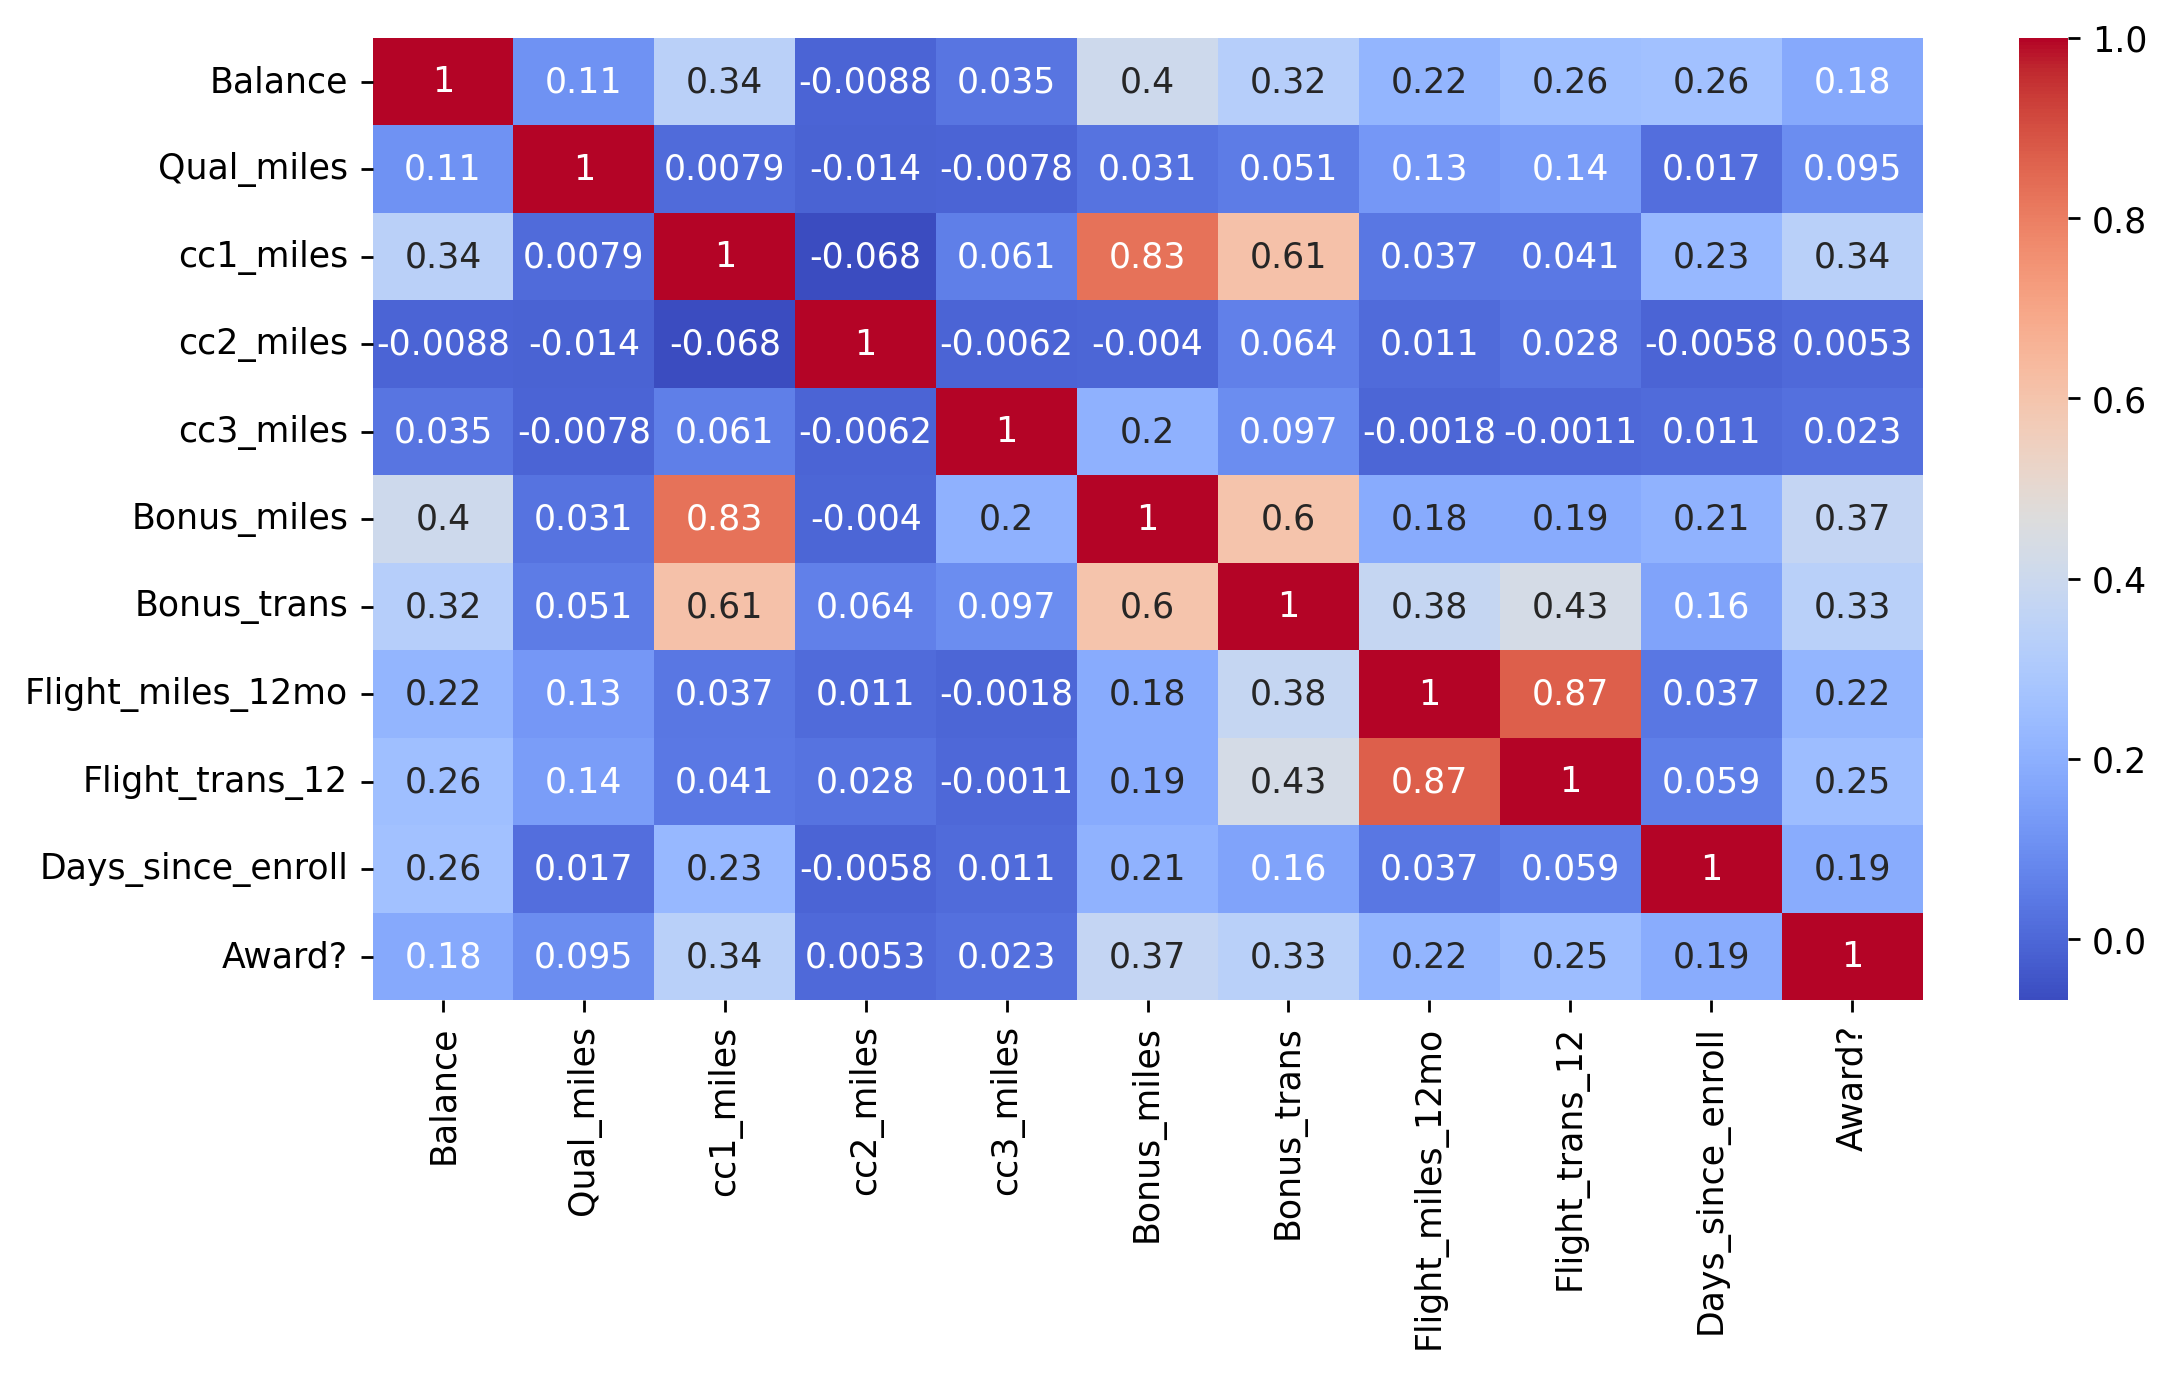

In [26]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

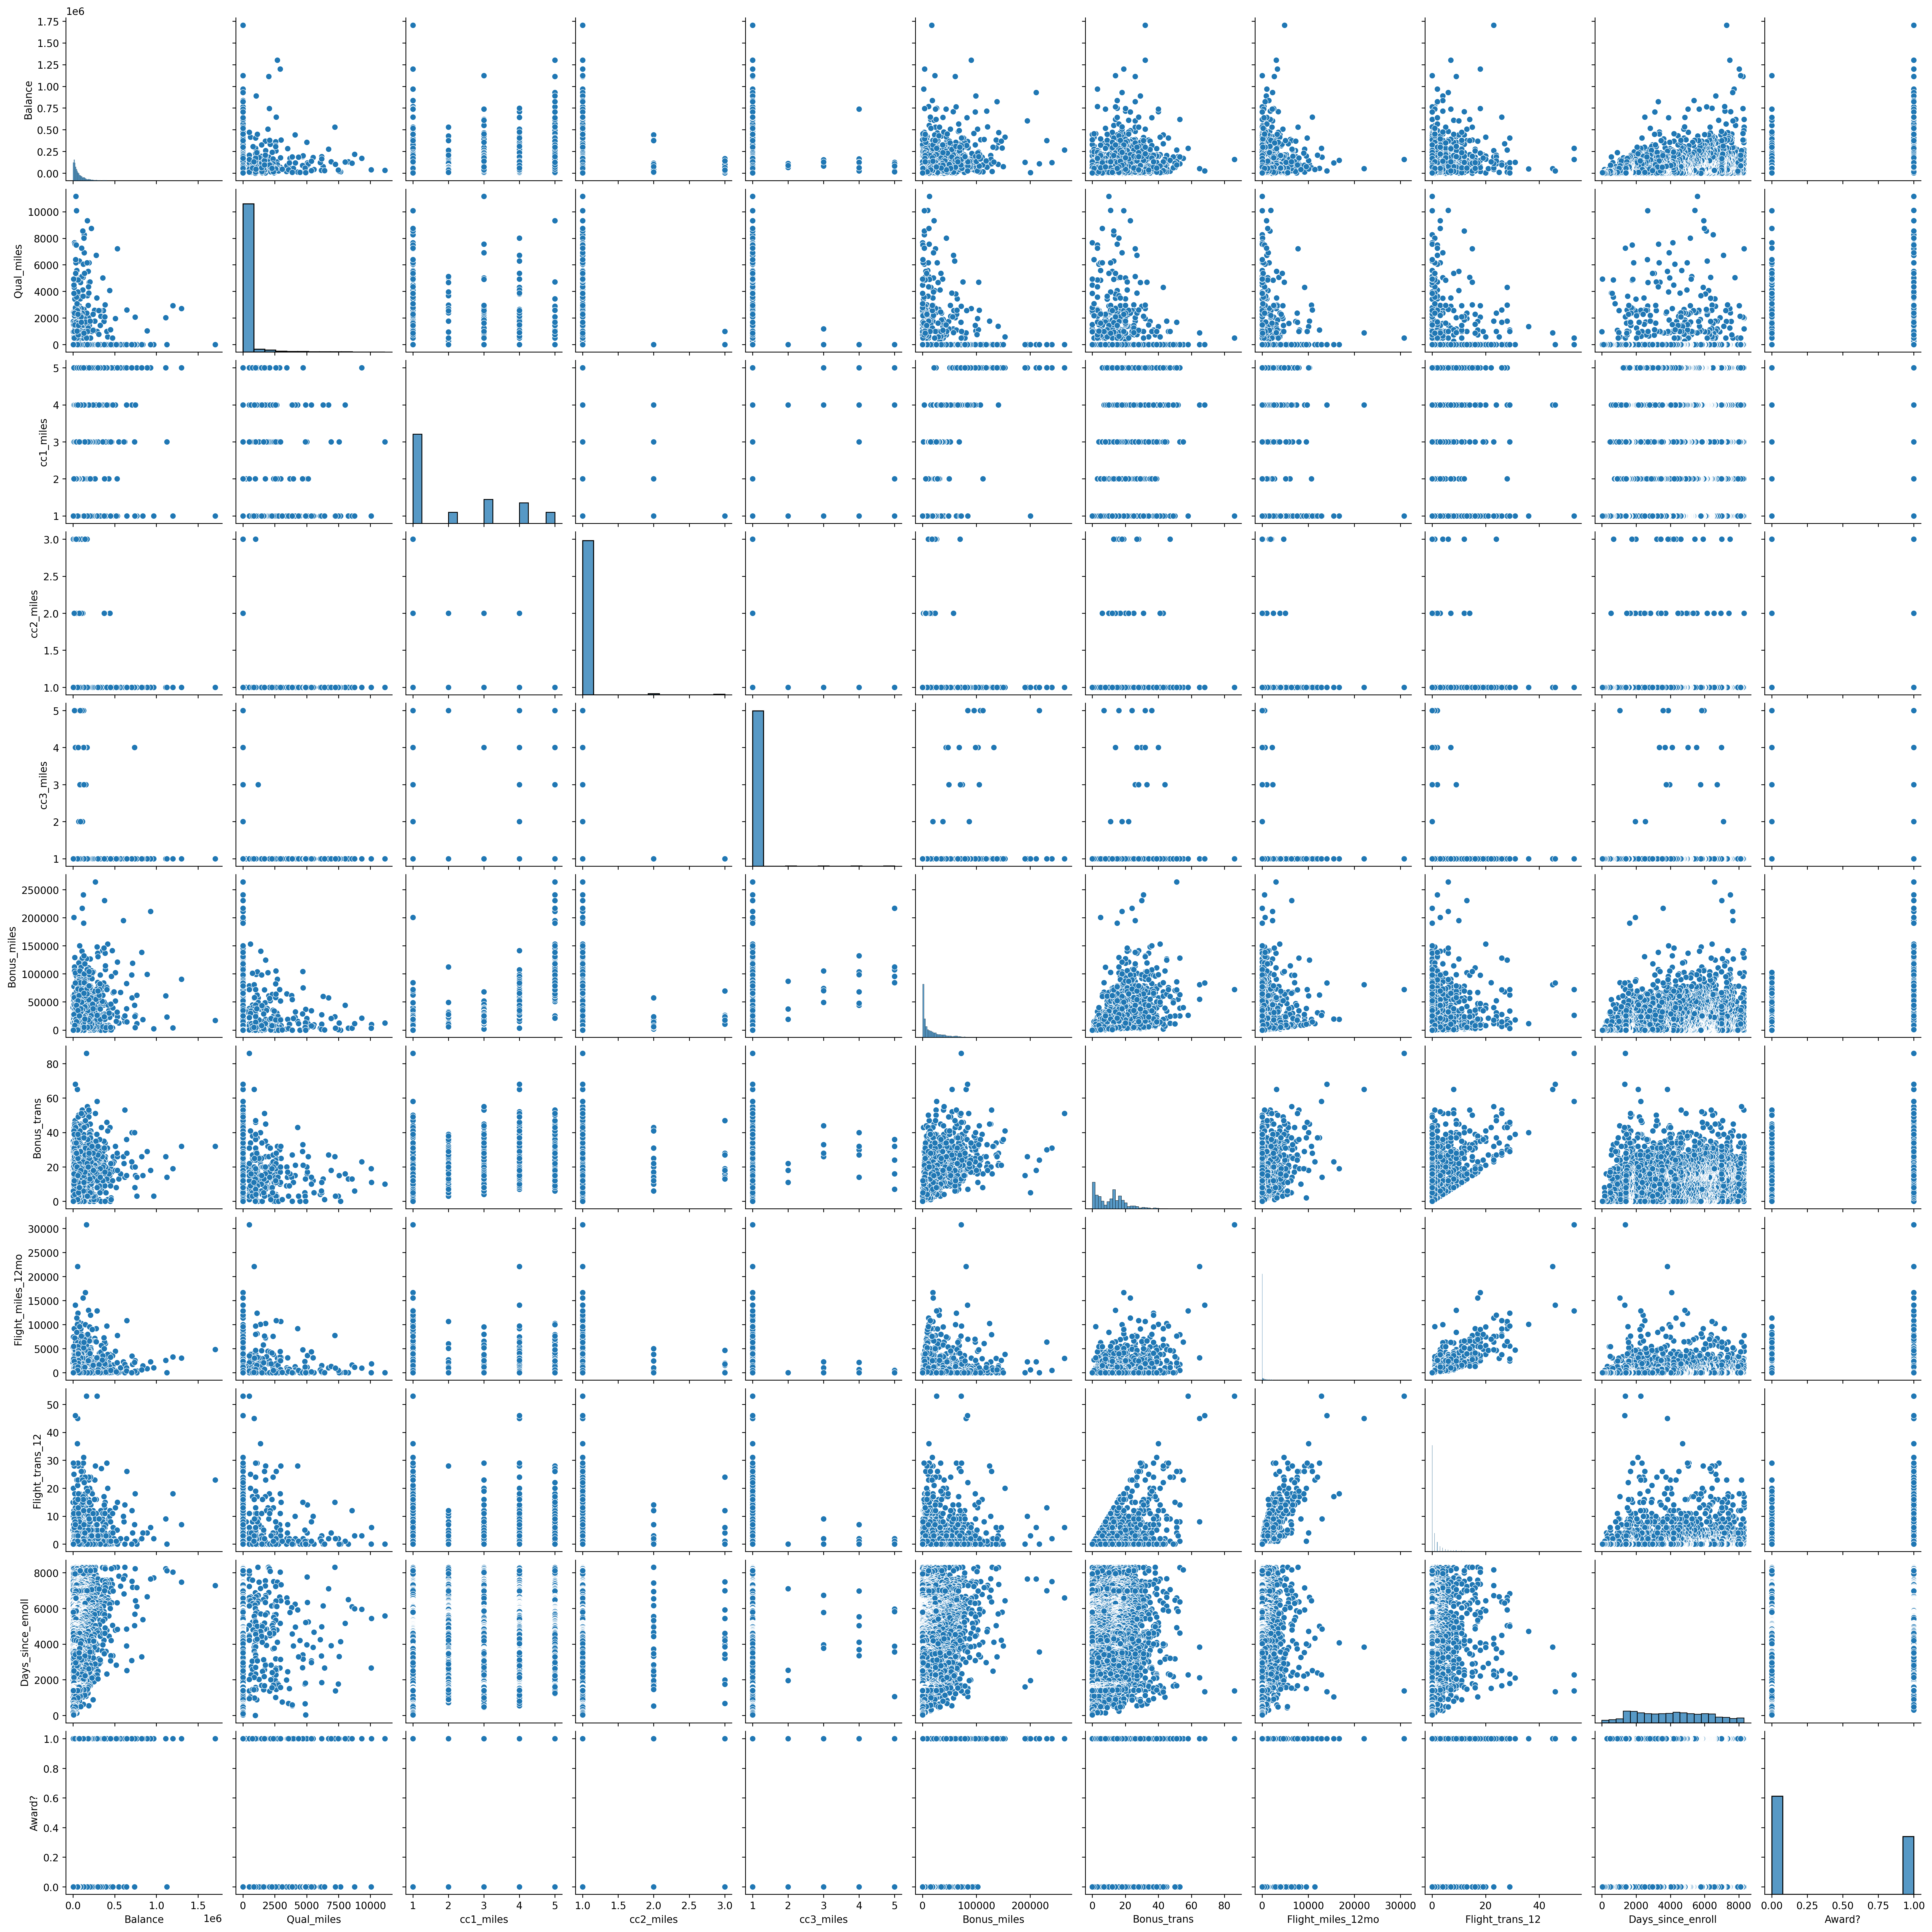

In [27]:
sns.pairplot(df)

In [28]:
type(x_df)

pandas.core.frame.DataFrame

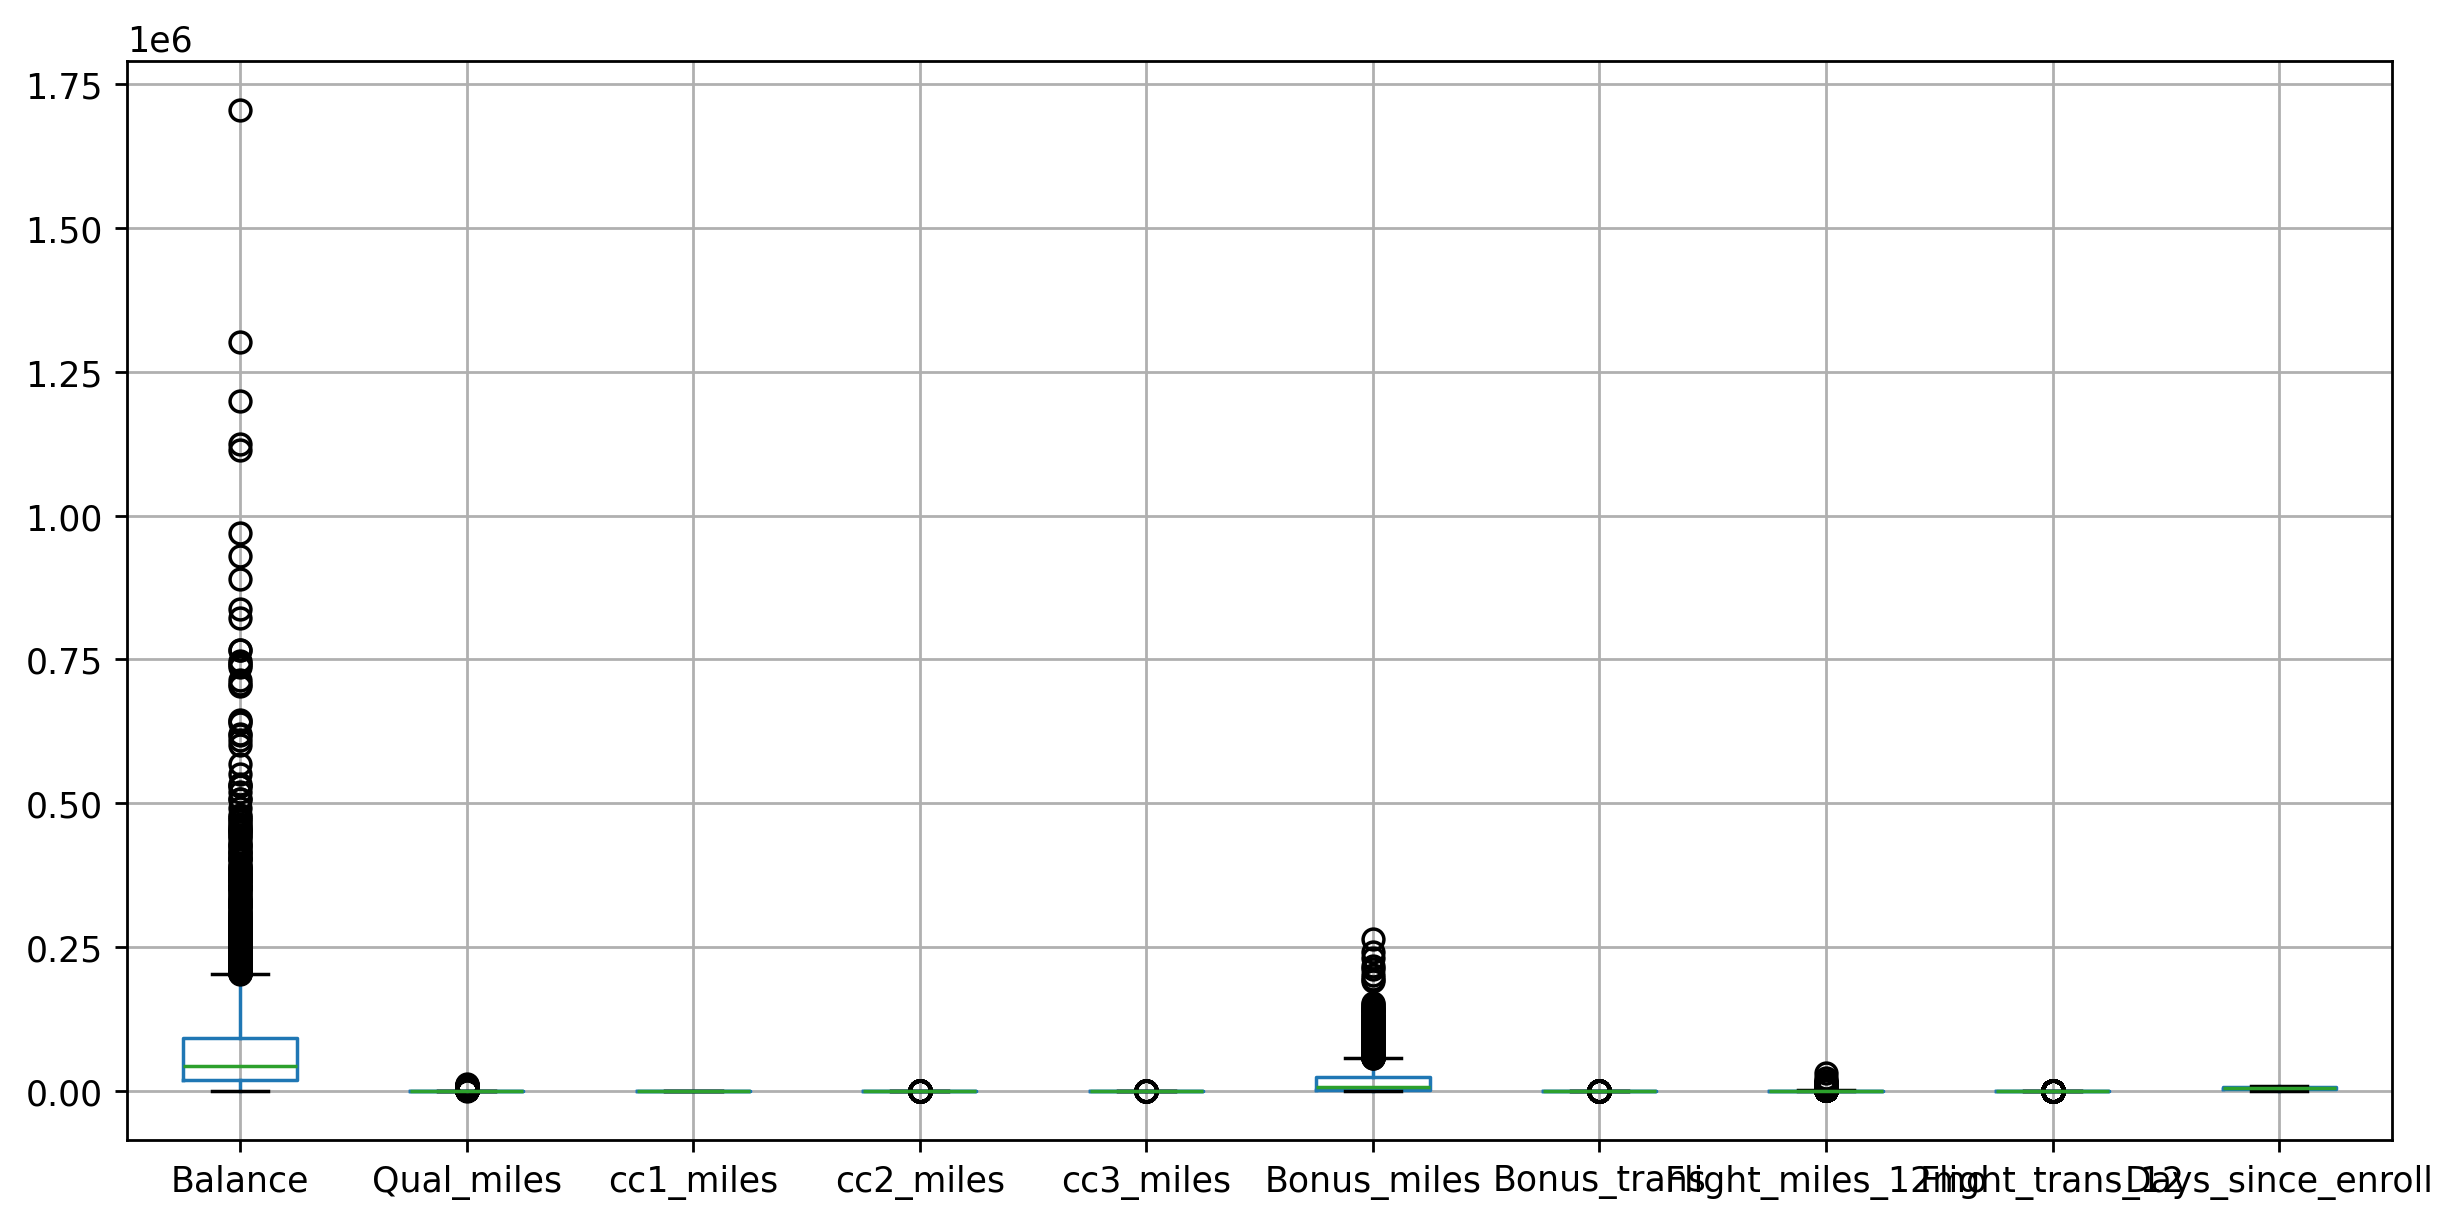

In [29]:
x_df.boxplot()
plt.tight_layout()

<Axes: xlabel='Balance', ylabel='Count'>

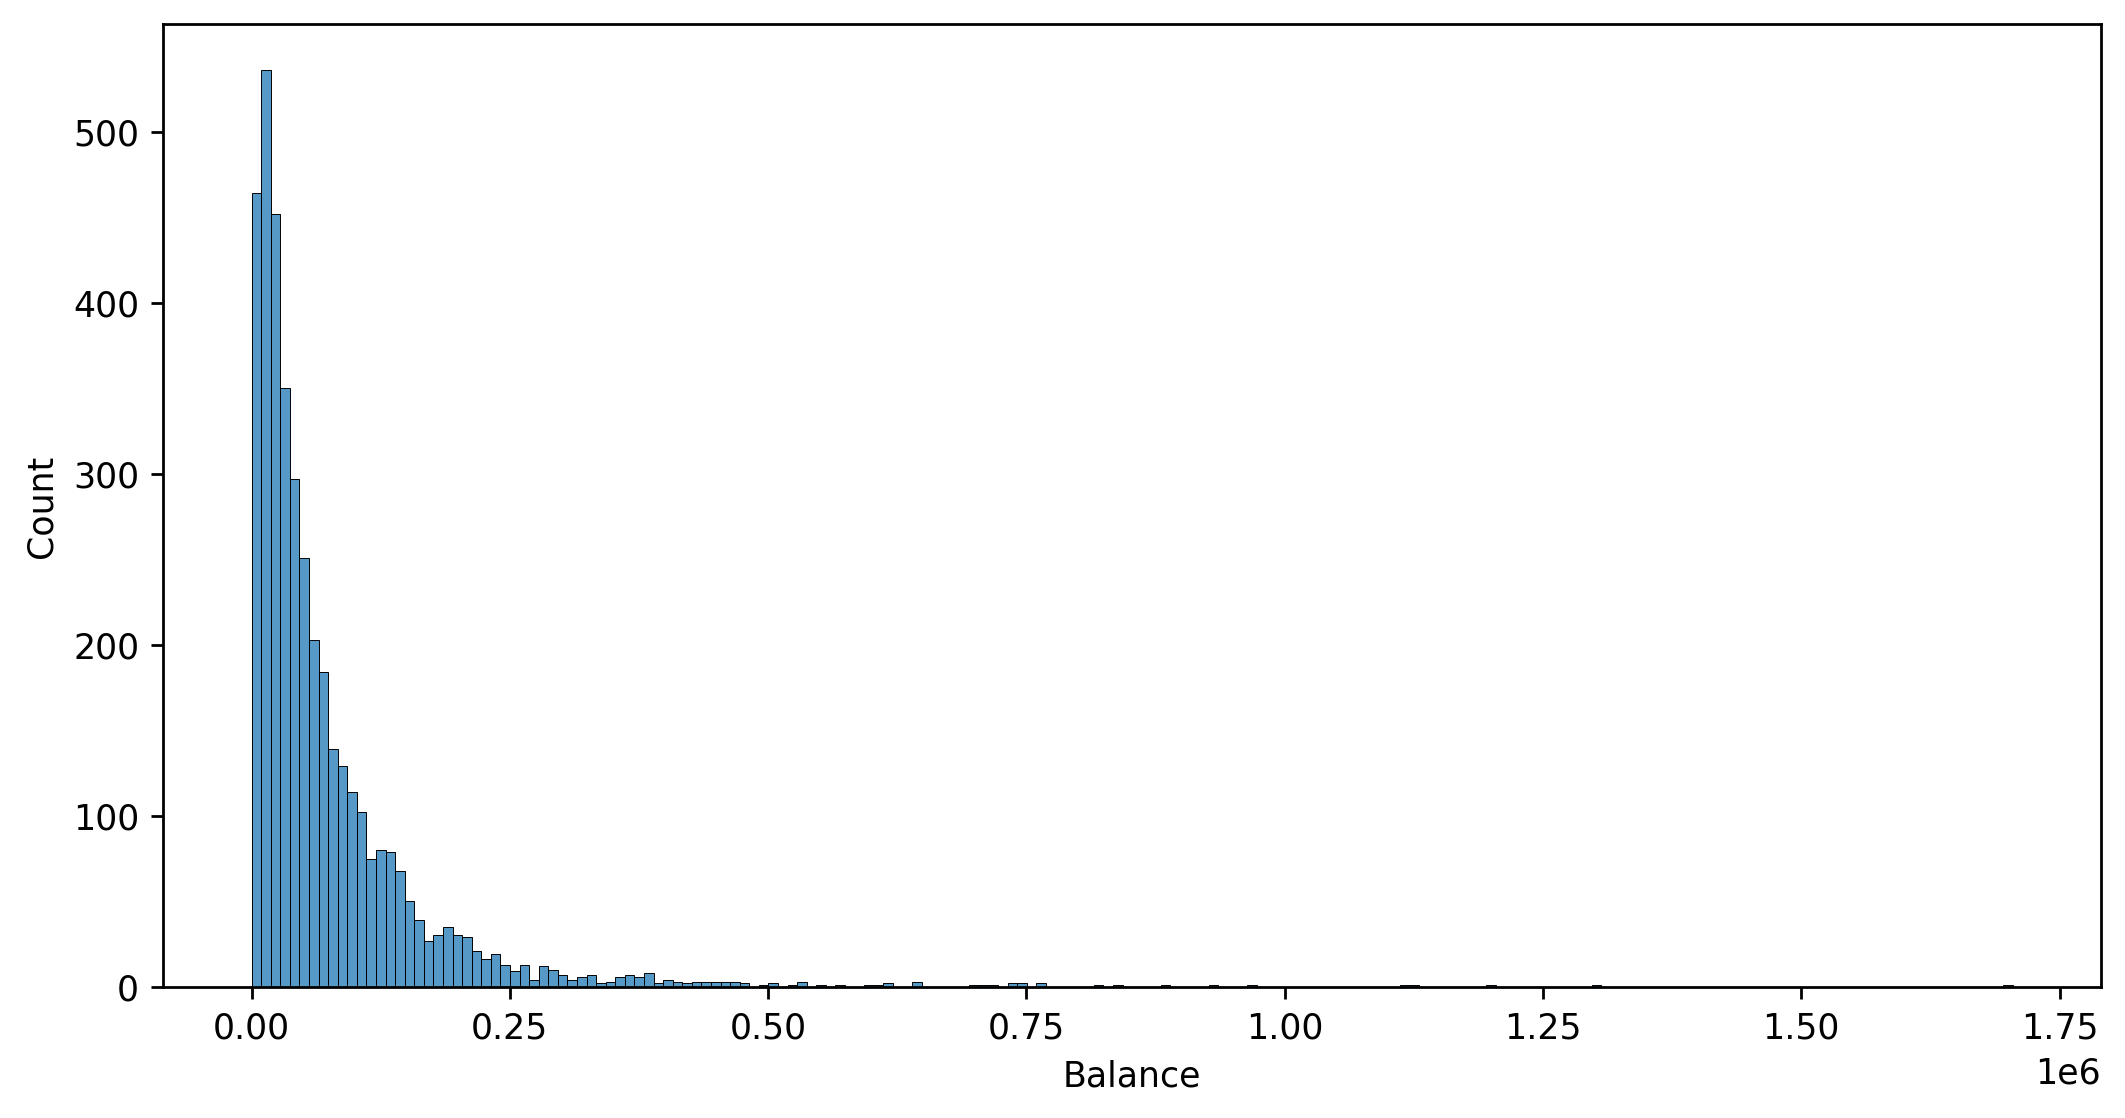

In [30]:
sns.histplot(x_df['Balance'])

# **Outlier Treatment**

In [31]:
def remove_outliers(x_df, columns):
    q1 = x_df[columns].quantile(0.25)
    q3 = x_df[columns].quantile(0.75)
    iqr = q3 - q1
    upper_E = q3 + (1.5 * iqr)
    lower_E = q1 - (1.5 * iqr)

    x_df[columns] = x_df[columns].clip(lower=lower_E, upper=upper_E)

    print(columns, "Min:", x_df[columns].min(), "Max:", x_df[columns].max(),"Expected range:", (lower_E, upper_E))

In [32]:
remove_outliers(x_df,'Balance')

Balance Min: 0.0 Max: 203218.75 Expected range: (np.float64(-92287.25), np.float64(203218.75))


In [33]:
remove_outliers(x_df,'Bonus_miles')

Bonus_miles Min: 0.0 Max: 57626.25 Expected range: (np.float64(-32575.75), np.float64(57626.25))


In [34]:
remove_outliers(x_df,'Flight_miles_12mo')

Flight_miles_12mo Min: 0.0 Max: 777.5 Expected range: (np.float64(-466.5), np.float64(777.5))


In [35]:
remove_outliers(x_df,'Qual_miles')

Qual_miles Min: 0 Max: 0 Expected range: (np.float64(0.0), np.float64(0.0))


<Axes: >

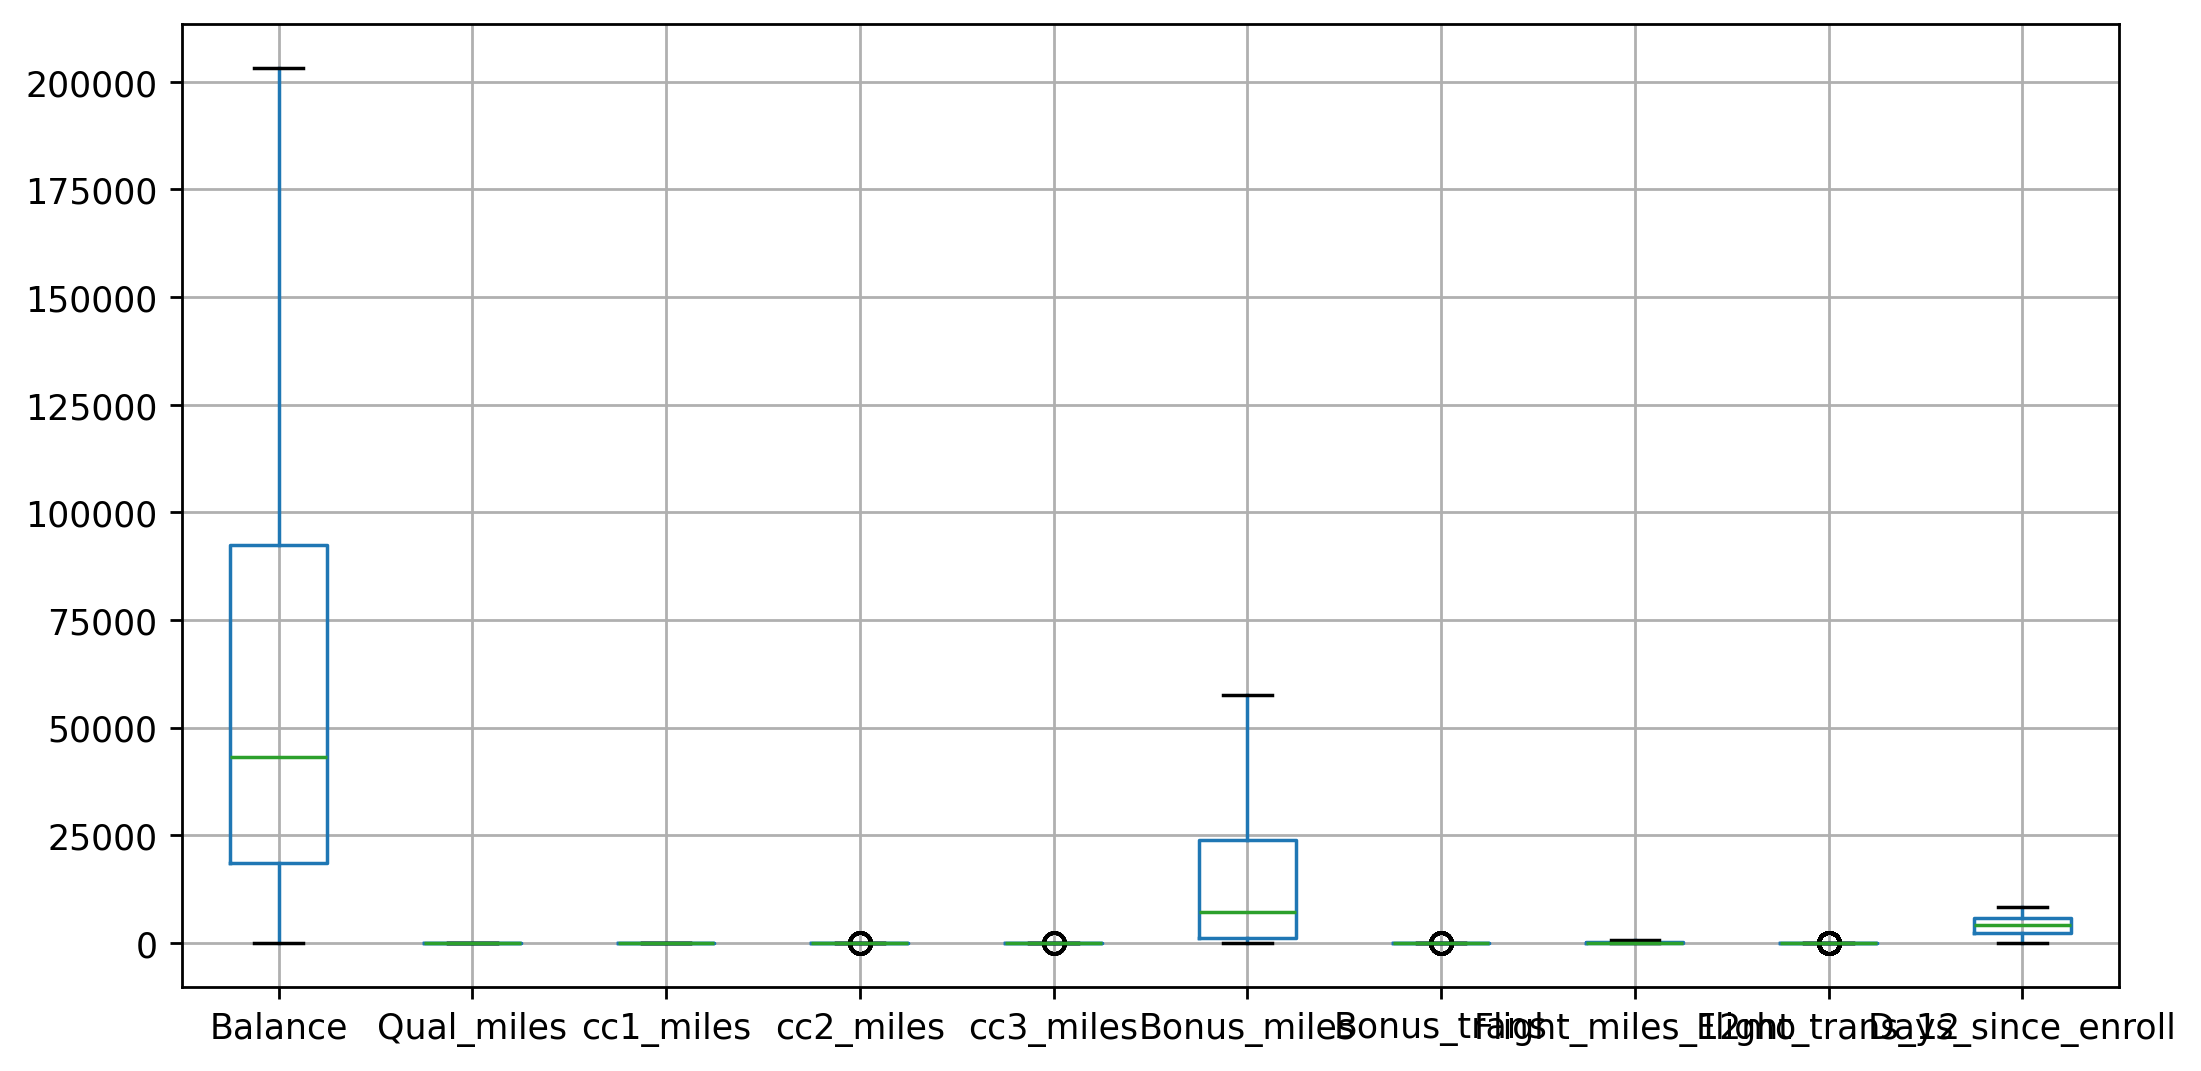

In [36]:
x_df.boxplot()#removed the more outliers

In [37]:
sc=StandardScaler()
sc_df=sc.fit_transform(x_df)

In [38]:
sc_df

array([[-0.60725829,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.39545434],
       [-0.75894657,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.37995704],
       [-0.38206963,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.41192021],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.60431348,
        -0.36216787, -1.31560393],
       [-0.15118775,  0.        , -0.76957841, ...,  1.09266586,
        -0.09850333, -1.31608822],
       [-1.03556163,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787, -1.31754109]])

In [39]:
type(sc_df)

numpy.ndarray

In [40]:
# sc_df=pd.DataFrame()

In [41]:
type(sc_df)

numpy.ndarray

# **KMeans Algorithm**

In [42]:
# kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=7)

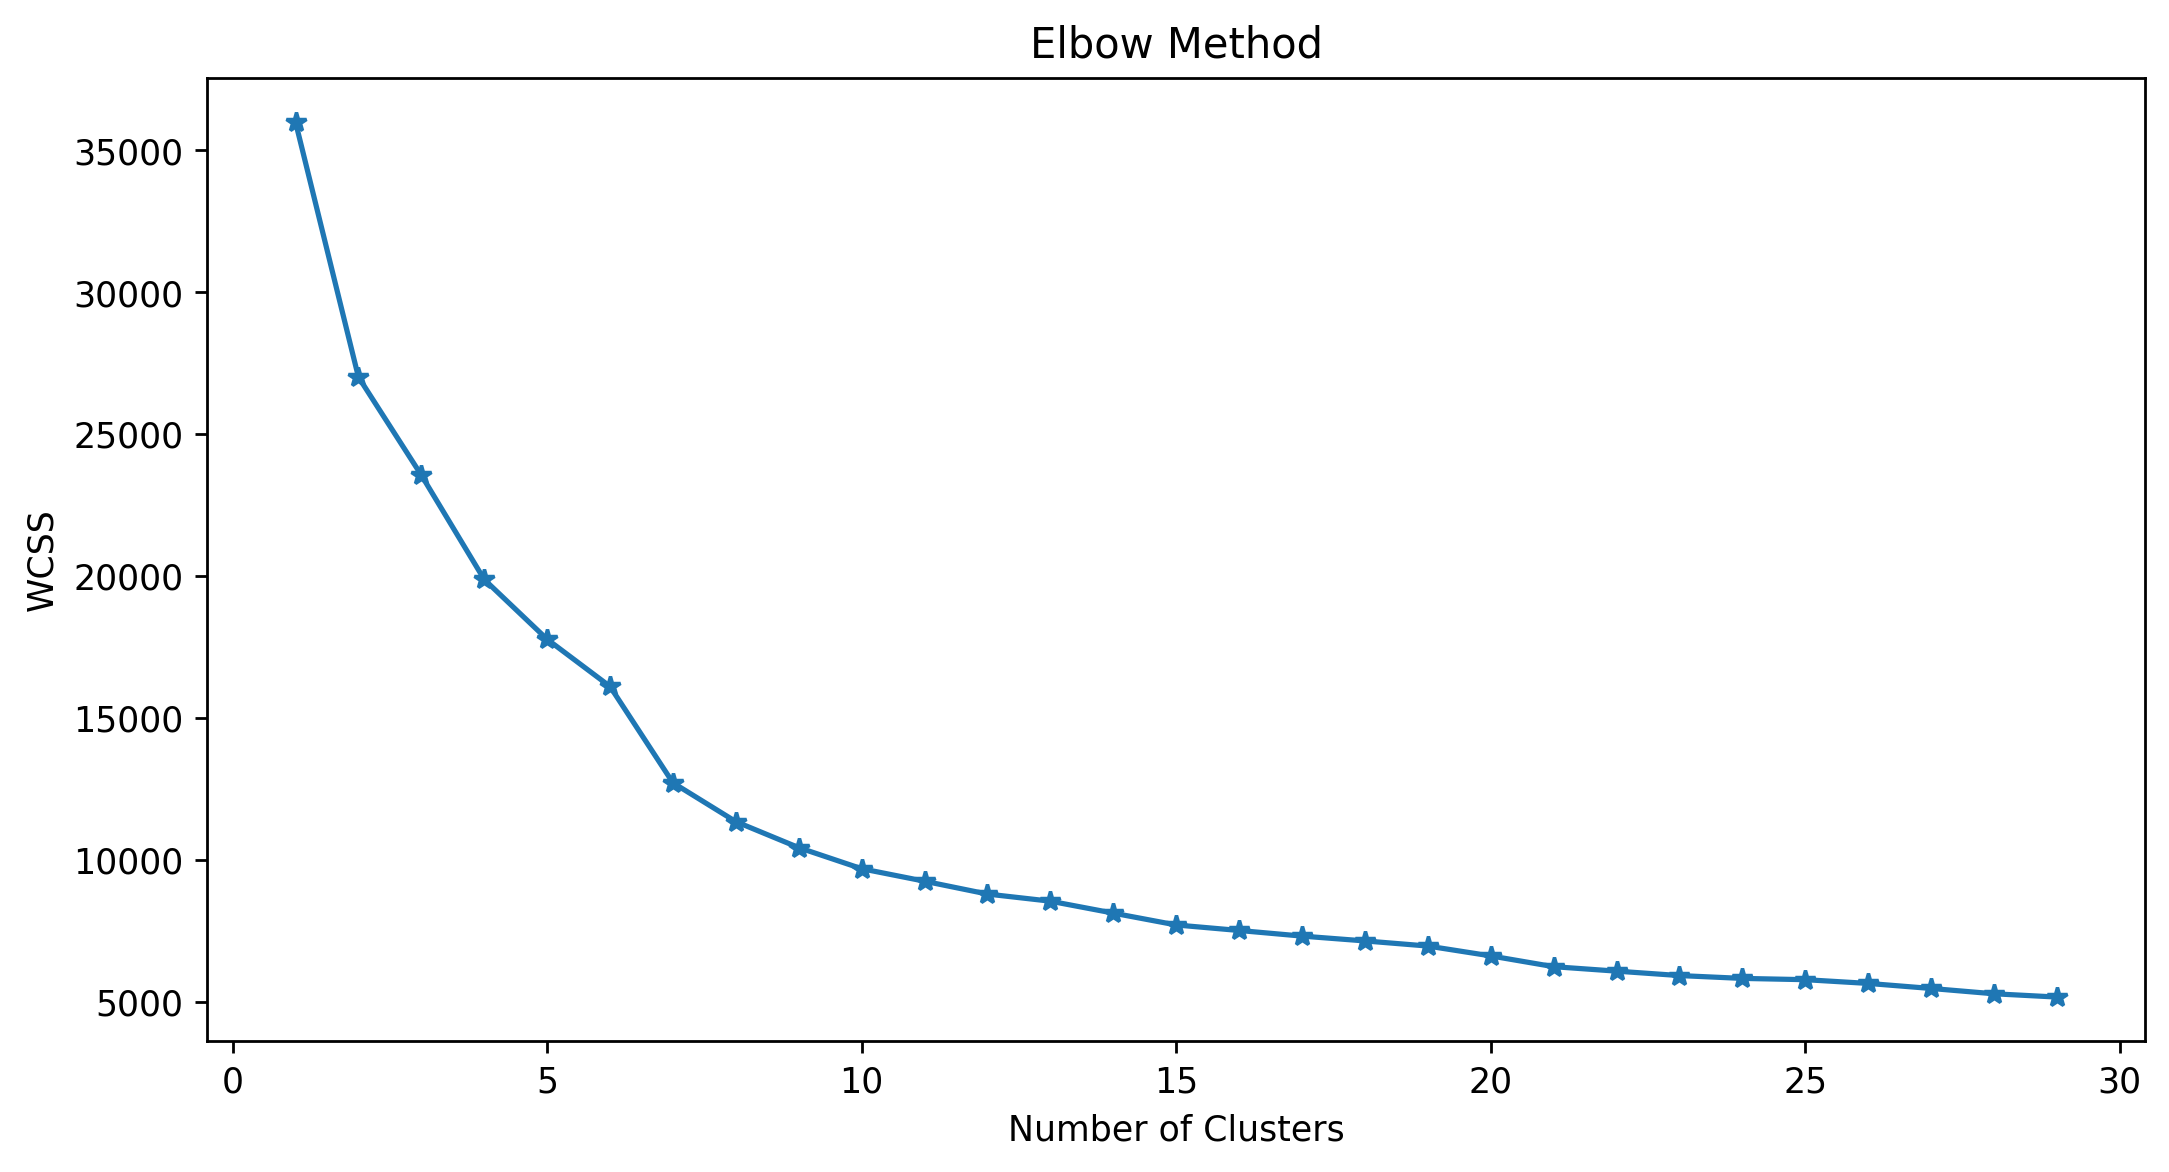

In [43]:
wcss=[]
for i in range(1,30):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=7)
  kmeans.fit(sc_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 30), wcss, marker='*')
# plt.plot(range(1,30),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [44]:
wcss

[35991.00000000003,
 27006.452850874466,
 23550.183957309288,
 19873.084275203793,
 17765.734983849783,
 16102.076179733498,
 12707.8750643642,
 11339.595066928176,
 10424.172672522913,
 9680.668174154549,
 9240.189801721242,
 8787.553039779994,
 8536.882759716758,
 8116.34518254304,
 7698.523269697423,
 7504.462349353529,
 7306.50595641603,
 7136.357563183954,
 6955.888636489473,
 6608.926310134572,
 6228.959734253283,
 6071.819792274042,
 5916.027345853196,
 5815.695680928779,
 5770.938236703778,
 5638.859145138624,
 5461.342977657113,
 5274.111100842185,
 5158.616117201969]

In [45]:
cluster2=KMeans(n_clusters=2,random_state=0)
predict2=cluster2.fit_predict(sc_df)

In [46]:
predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [47]:
clusters3=KMeans(n_clusters=3,random_state=4)
predict3=clusters3.fit_predict(sc_df)

In [48]:
predict3

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [49]:
cluster4=KMeans(n_clusters=4,random_state=0)
predict4=cluster4.fit_predict(sc_df)

In [50]:
predict4

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [51]:
kmeans.labels_

array([10, 10, 10, ...,  2,  1, 20], dtype=int32)

In [52]:
cluster5=KMeans(n_clusters=5,random_state=2)
predict5=cluster5.fit_predict(sc_df)

In [53]:
predict5

array([0, 0, 0, ..., 0, 4, 0], dtype=int32)

In [54]:
cluster6=KMeans(n_clusters=6,random_state=0)
predict6=cluster6.fit_predict(sc_df)

In [55]:
predict6

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [56]:
cluster7=KMeans(n_clusters=7,random_state=2)
predict7=cluster7.fit_predict(sc_df)

In [57]:
predict7

array([0, 0, 0, ..., 6, 0, 0], dtype=int32)

In [58]:
cluster8=KMeans(n_clusters=8,random_state=2)
predict8=cluster8.fit_predict(sc_df)

In [59]:
predict8

array([4, 4, 4, ..., 7, 0, 0], dtype=int32)

In [60]:
cluster9=KMeans(n_clusters=9,random_state=2)
predict9=cluster9.fit_predict(sc_df)

In [61]:
predict9

array([4, 4, 4, ..., 8, 0, 0], dtype=int32)

In [62]:
x_df['cluster2']=predict2

In [63]:
x_df['cluster3']=predict3

In [64]:
x_df['cluster4']=predict4

In [65]:
x_df['cluster5']=predict5

In [66]:
x_df['cluster6']=predict6

In [67]:
x_df['cluster7']=predict7

In [68]:
x_df['cluster8']=predict8

In [69]:
x_df['cluster9']=predict9

In [70]:
x_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     28143.0           0          1          1          1        174.0   
1     19244.0           0          1          1          1        215.0   
2     41354.0           0          1          1          1       4123.0   
3     14776.0           0          1          1          1        500.0   
4     97752.0           0          4          1          1      43300.0   
...       ...         ...        ...        ...        ...          ...   
3994  18476.0           0          1          1          1       8525.0   
3995  64385.0           0          1          1          1        981.0   
3996  73597.0           0          3          1          1      25447.0   
3997  54899.0           0          1          1          1        500.0   
3998   3016.0           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                0.0                0               7000   
1               2                0.0                0               6968   
2               4                0.0                0               7034   
3               1                0.0                0               6952   
4              26              777.5                4               6935   
...           ...                ...              ...                ...   
3994            4              200.0                1               1403   
3995            5                0.0                0               1395   
3996            8                0.0                0               1402   
3997            1              500.0                1               1401   
3998            0                0.0                0               1398   

      cluster2  cluster3  cluster4  cluster5  cluster6  cluster7  cluster8  \
0            0         1         0         0         0         0         4   
1            0         1         0         0         0         0         4   
2            0         1         0         0         0         0         4   
3            0         1         0         0         0         0         4   
4            1         0         3         2         3         2         2   
...        ...       ...       ...       ...       ...       ...       ...   
3994         0         1         0         0         5         0         0   
3995         0         1         0         0         5         0         0   
3996         0         1         0         0         5         6         7   
3997         0         1         2         4         5         0         0   
3998         0         1         0         0         5         0         0   

      cluster9  
0            4  
1            4  
2            4  
3            4  
4            3  
...        ...  
3994         0  
3995         0  
3996         8  
3997         0  
3998         0  

[3999 rows x 18 columns]

In [71]:
x_df['cluster3'].value_counts()#cluster 0,1,2

cluster3
1    2329
0    1119
2     551
Name: count, dtype: int64

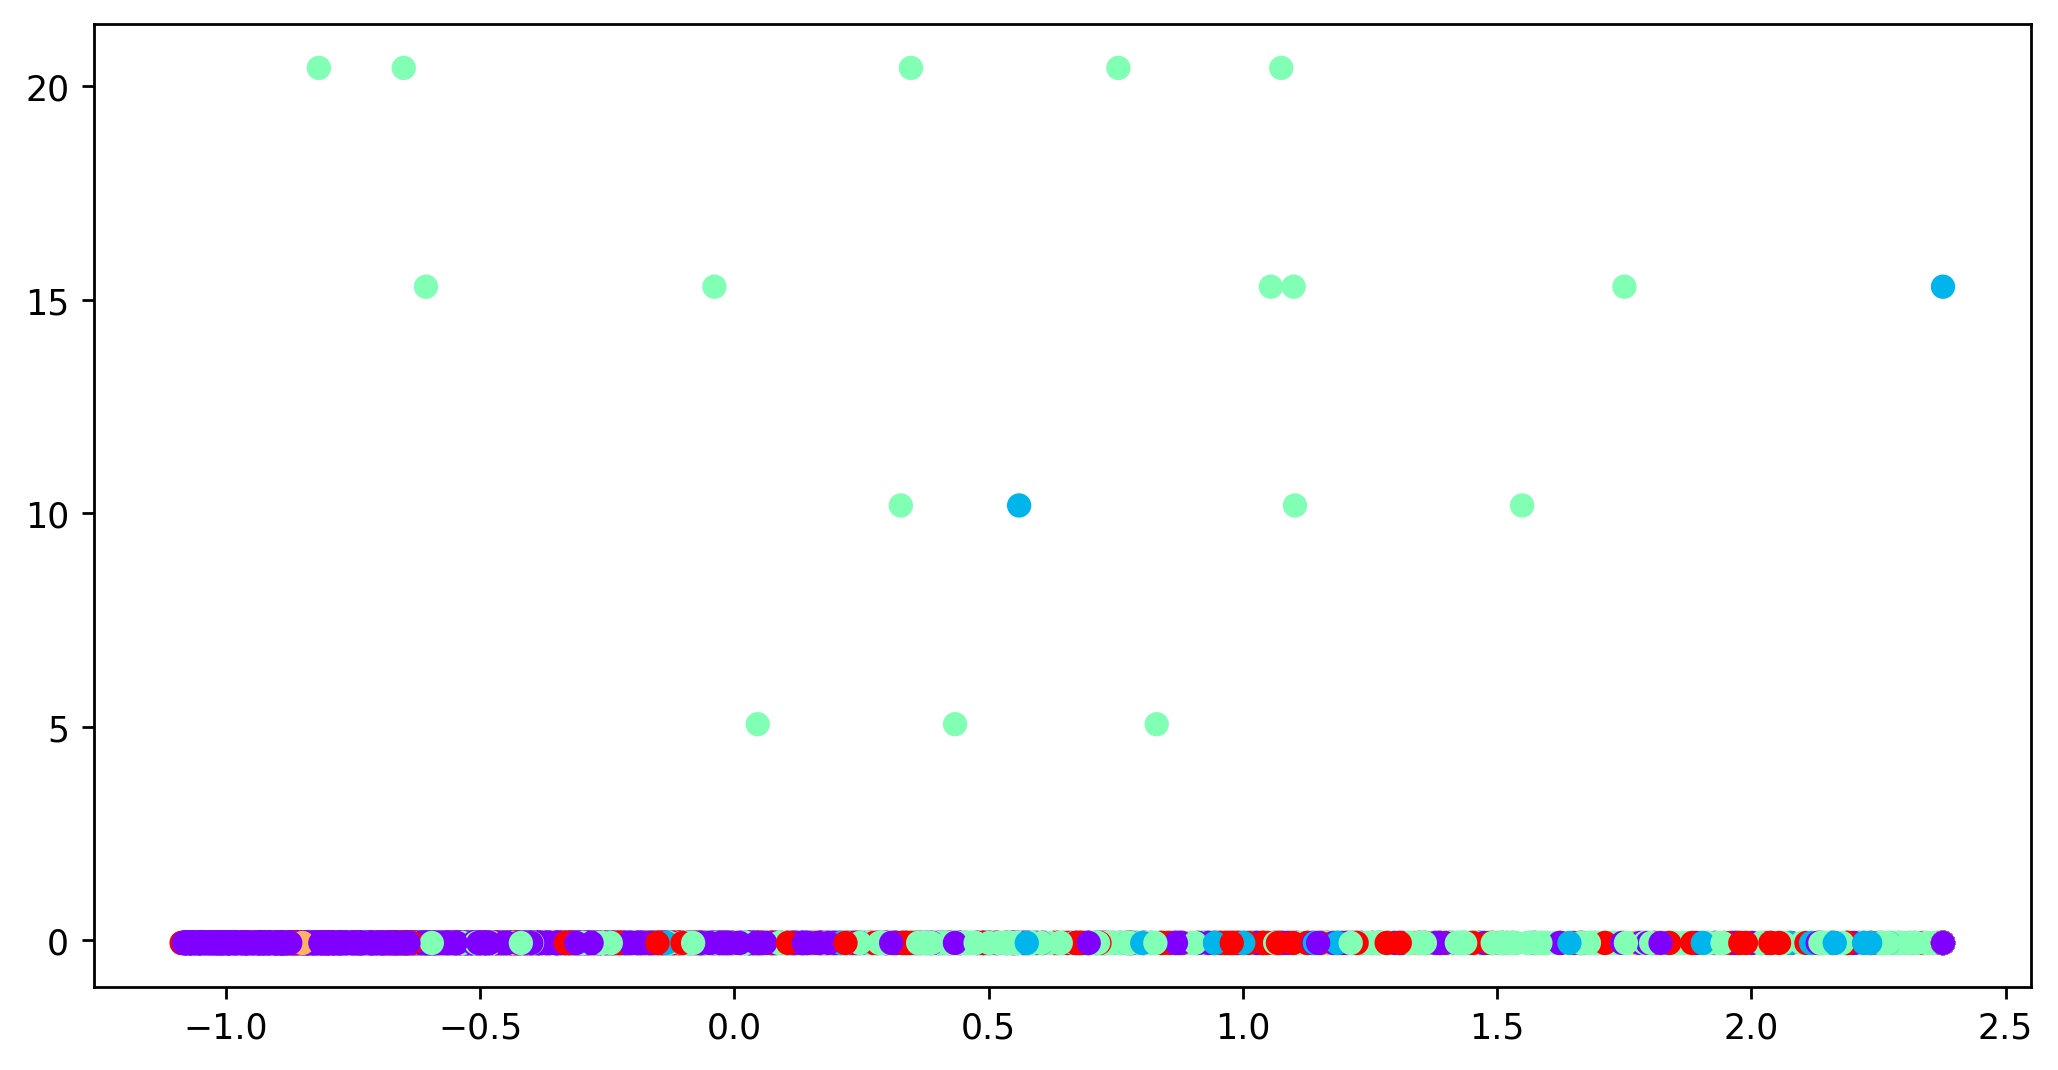

In [239]:
plt.scatter(sc_df[:,0],sc_df[:,4],c=predict5,cmap='rainbow')

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
silhouette_score(sc_df,predict3)

np.float64(0.3418256599777392)

In [74]:
silhouette_score(sc_df,predict4)

np.float64(0.3138192956097546)

In [75]:
silhouette_score(sc_df,predict5)

np.float64(0.32121620964424147)

In [76]:
silhouette_score(sc_df,predict6)

np.float64(0.2500953065339502)

In [77]:
silhouette_score(sc_df,predict7)

np.float64(0.2803922993026439)

In [78]:
silhouette_score(sc_df,predict2)# almost Best accuracy no. of clusters should be 2 its a fair clustering

np.float64(0.34862368158330687)

In [79]:
silhouette_score(sc_df,predict8)

np.float64(0.25877492489614534)

In [80]:
silhouette_score(sc_df,predict9)

np.float64(0.2647511153549588)

# **DBSCAN Algorithm**

In [212]:
dbscan=DBSCAN(eps=1.5,min_samples=11)

In [213]:
y=dbscan.fit_predict(sc_df)
y

array([0, 0, 0, ..., 0, 0, 0])

In [214]:
df['VAL']=y

In [207]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  VAL  
0          0    0  
1          0    0  
2          0    0  
3          0    0  
4          1    0  
...      ...  ...  
3994       1    0  
3995       1    0  
3996       1    0  
3997       0    0  
3998       0    0  

[3999 rows x 12 columns]

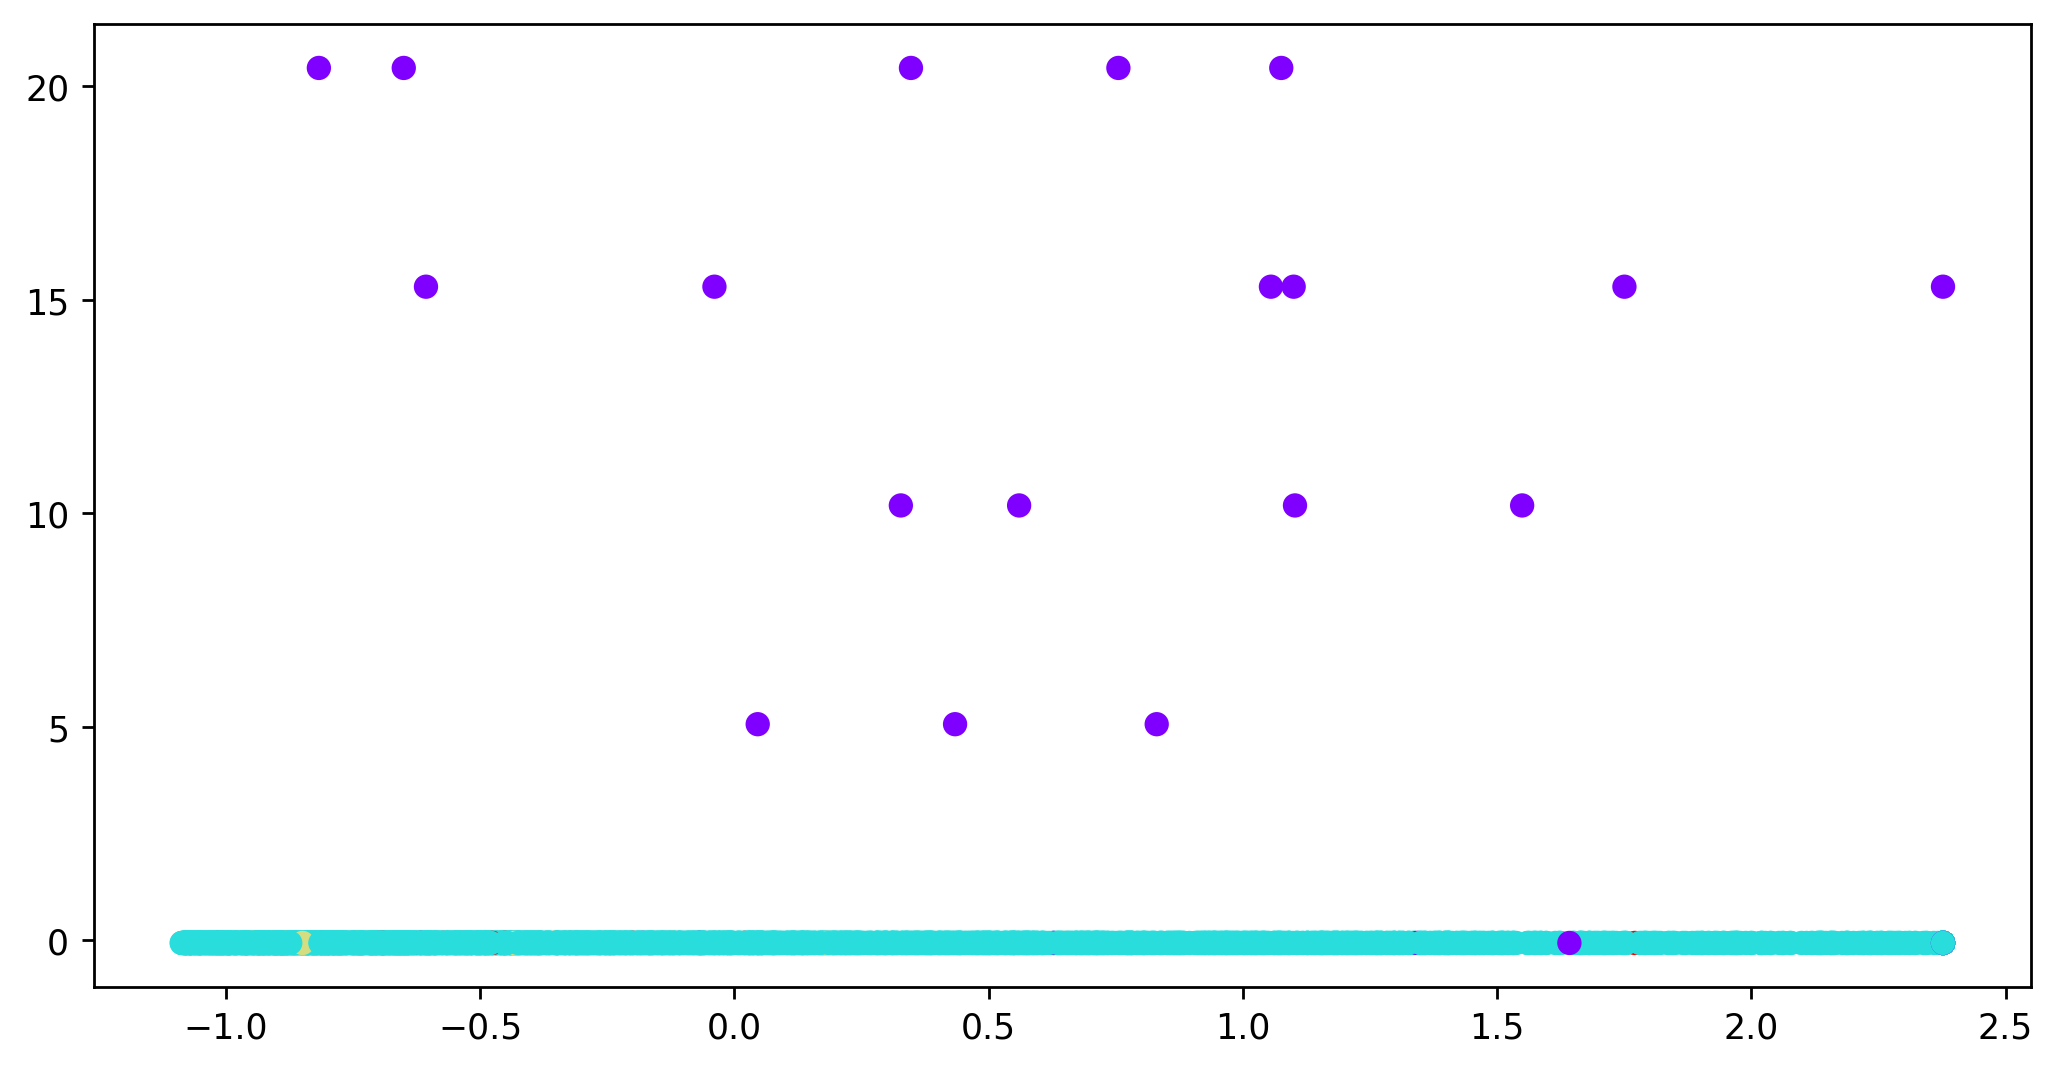

In [208]:
plt.scatter(sc_df[:,0],sc_df[:,4],c=y,cmap='rainbow')

In [215]:
silhouette_score(sc_df,y)

np.float64(0.5425019193631355)

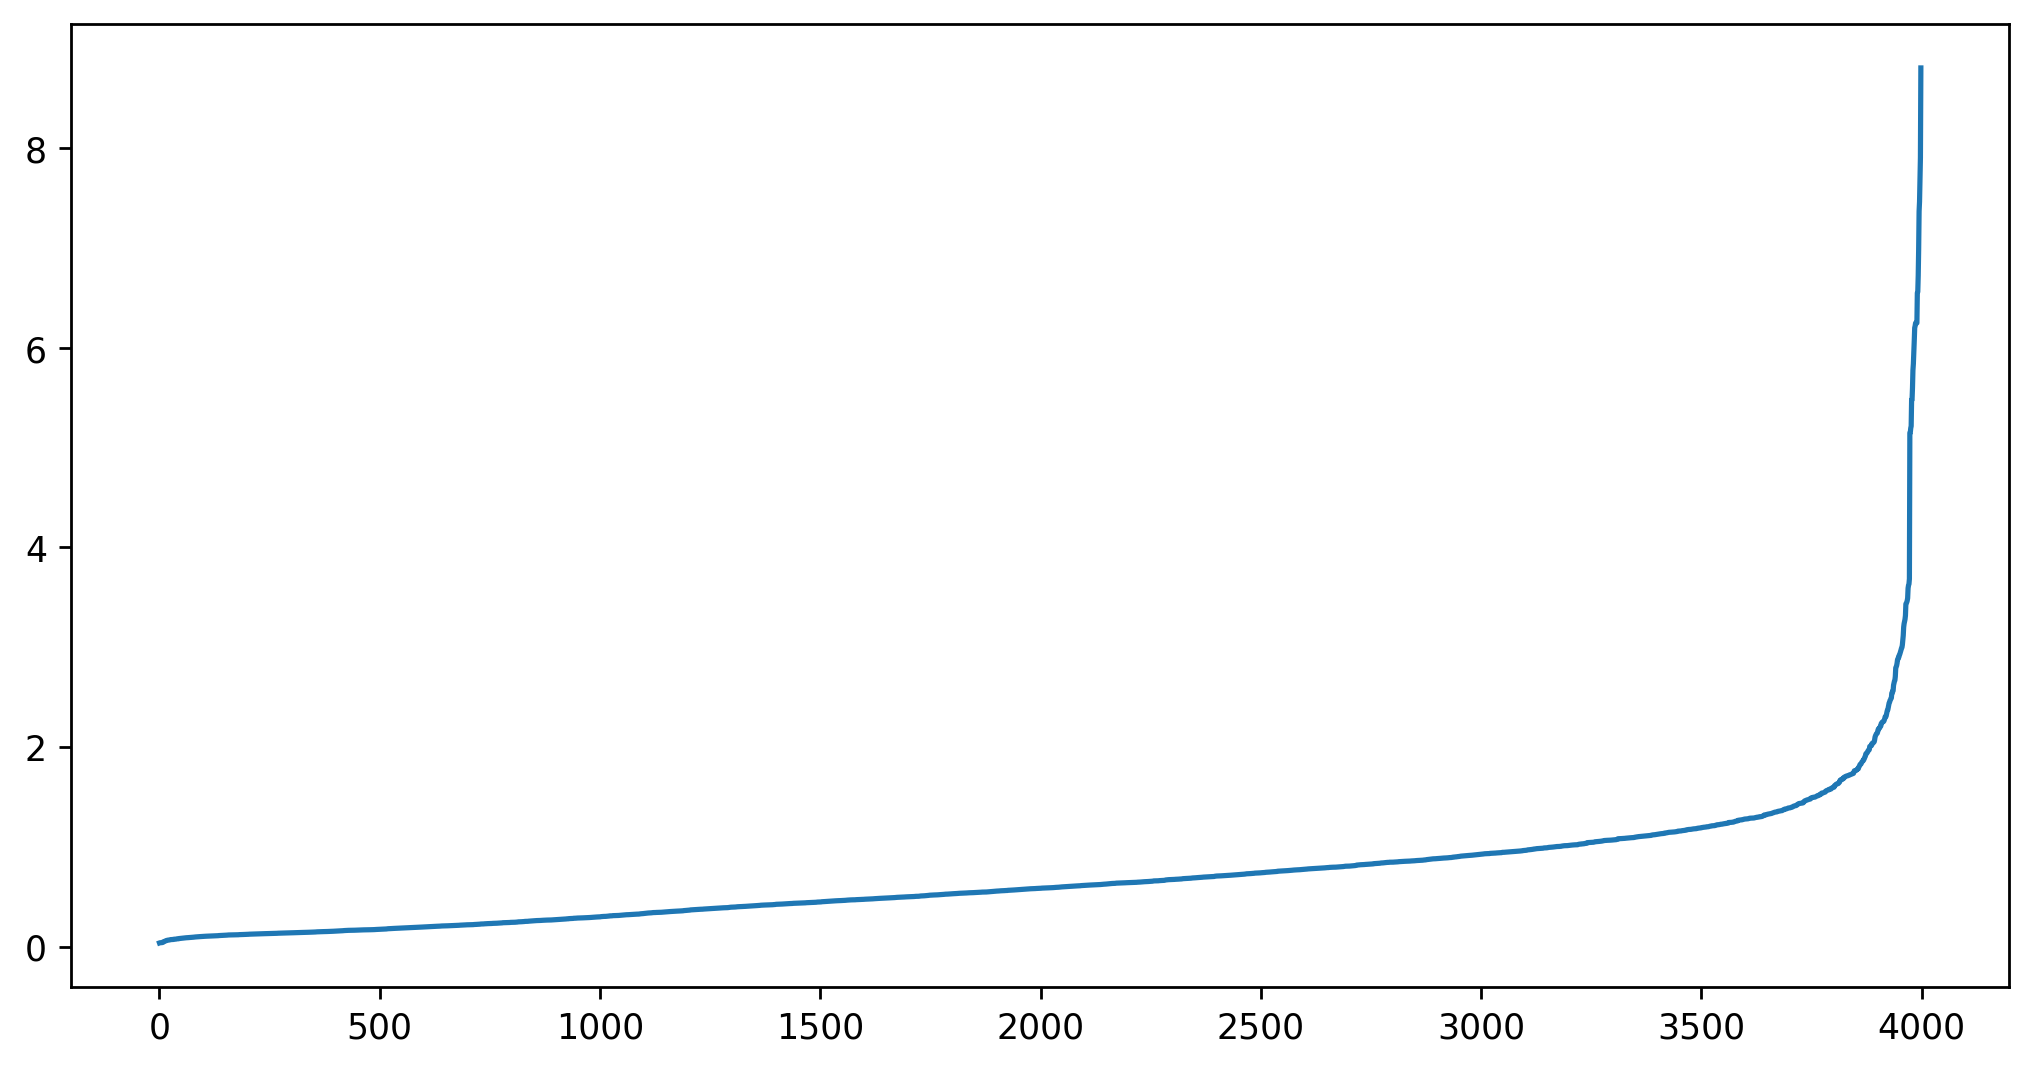

In [210]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=11)
nbrs = neigh.fit(sc_df)
distances, indices = nbrs.kneighbors(sc_df)

# Take the distance to the 5th nearest neighbor
distances = np.sort(distances[:, 10])

# Plot
plt.plot(distances)

In [216]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(-1): np.int64(140), np.int64(0): np.int64(3843), np.int64(1): np.int64(16)}


After tuning the DBSCAN parameters, the model achieved a silhouette score of 0.54 with eps = 1.5 and min_samples = 11.
The clustering resulted in 3 main clusters (including one large and two small) , indicating strong cluster separation and density-based grouping.
Hence, DBSCAN outperformed K-Means for this dataset.

# **Hierarchical DBSCAN**

In [217]:
import hdbscan

In [236]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=11)
y1 = clusterer.fit_predict(sc_df)

# Cluster labels
print(np.unique(y1, return_counts=True))

(array([-1,  0,  1]), array([  24,   28, 3947]))


In the HDBSCAN algorithm i have choosen min_cluster_size as 20 and min_samples=11.
i hev finalized 20 because at 20 im getting 3 clusters with one cluster is containing majority of datapoints and less noise. Whereas min_cluster_size beyond 20 is making 4 to 5 clusters containing 40% of the noise datapoints only in one cluster. so i decided to choose min_cluster_size as 20.

with min_cluster_size=20 i got 3 clusters having 24 datapoints are noisy datapoints which covers one cluster, in 2nd cluster 0 it contains 28 datapoints that is very less, and in last cluster 1 majority of datapoints are covered like 3947. this is the desnse region covered by cluster1

In [237]:
silhouette_score(sc_df,y1)

np.float64(0.5577308761823603)

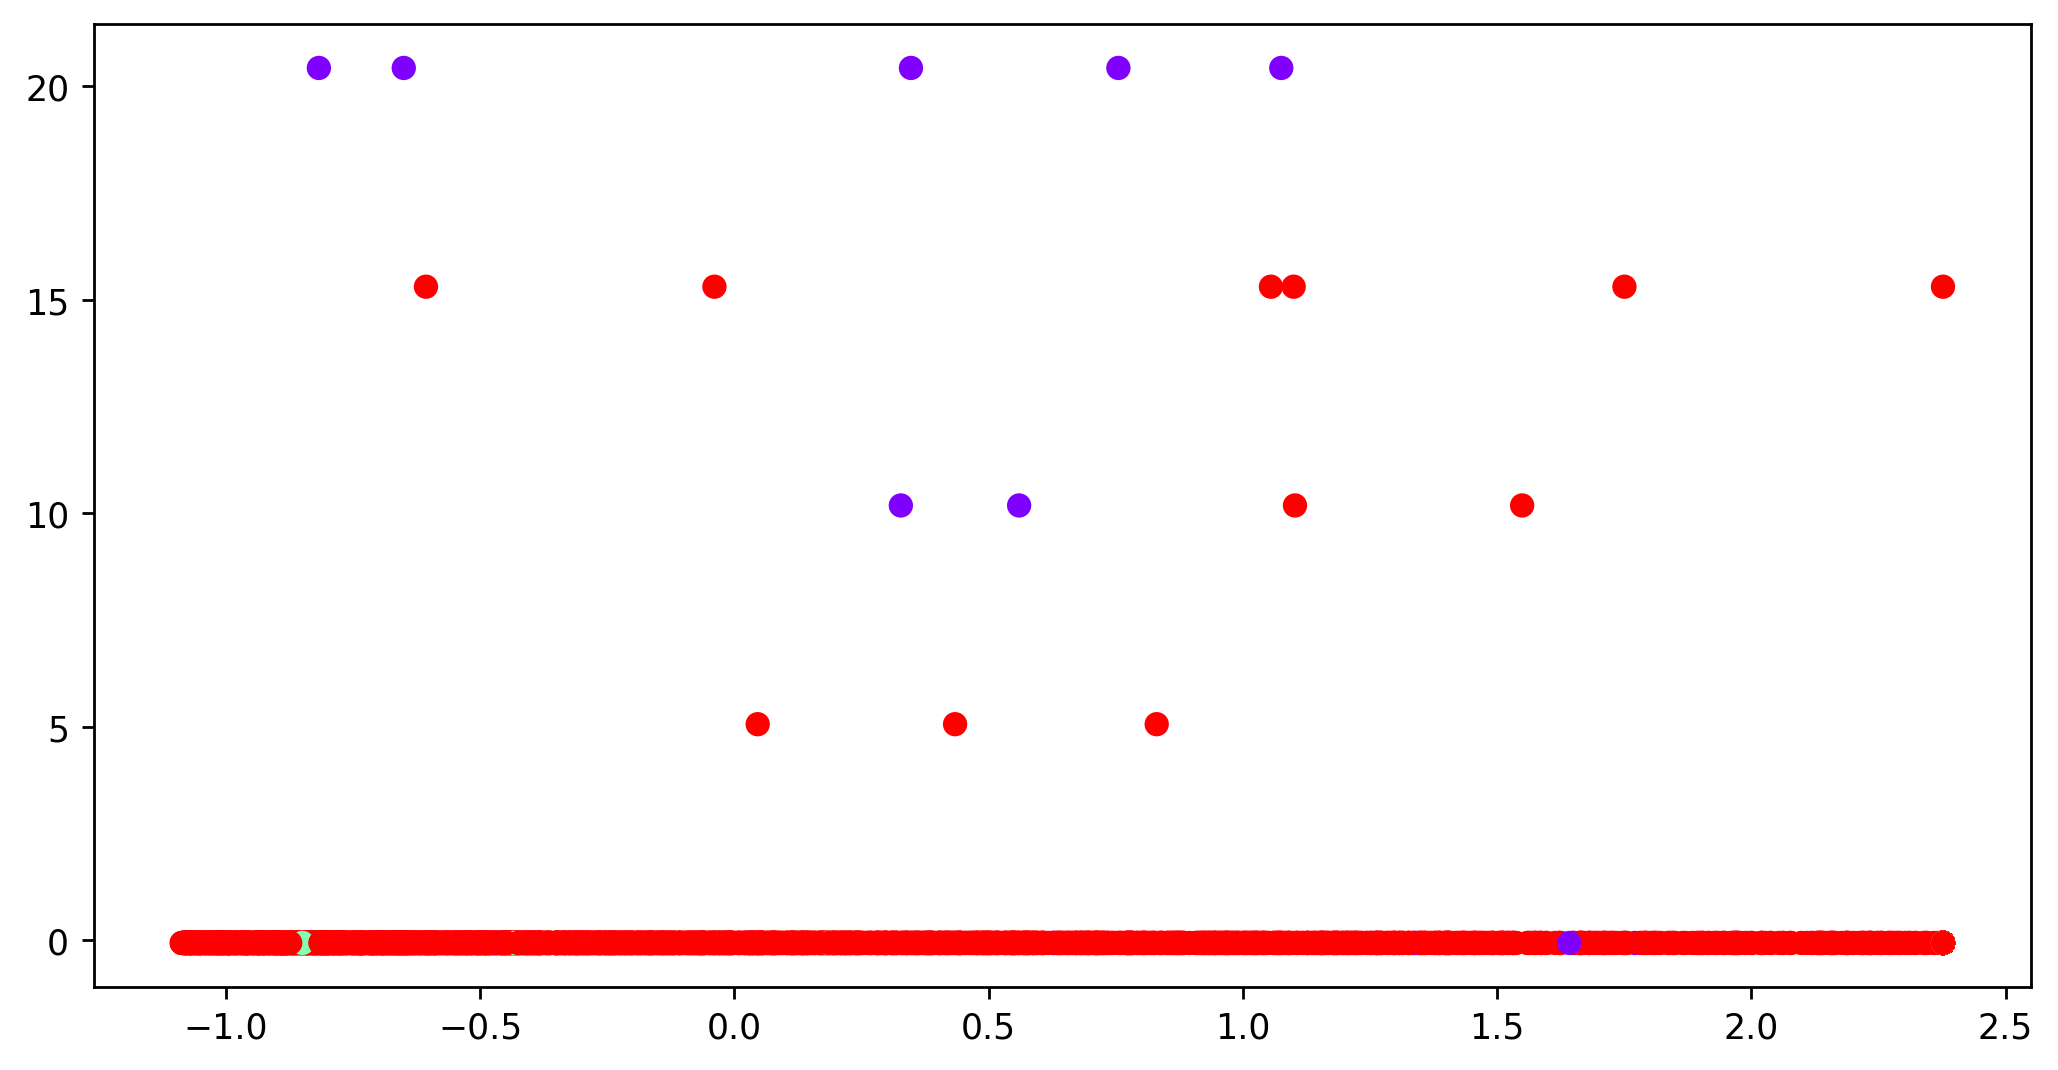

In [238]:
plt.scatter(sc_df[:,0],sc_df[:,4],c=y1,cmap='rainbow')